In [1]:
Name: Krishna Praamod Hirve   
Roll No : 3422
Mini Project

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
titanic_data = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.shape


(891, 12)

In [6]:
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic_data = titanic_data.drop(columns='Cabin', axis = 1)


In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace= True)


In [11]:
print(titanic_data['Embarked'].mode()[0])


S


In [12]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace= True)


In [13]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
titanic_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [15]:
titanic_data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [16]:
titanic_data['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [17]:
titanic_data.replace({'Sex':{'male':0,'female':1}}, inplace = True)


In [18]:
titanic_data['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [19]:
titanic_data.replace({'Embarked':{'S':0,'C':1, 'Q':2}}, inplace = True)


In [20]:
sns.set()


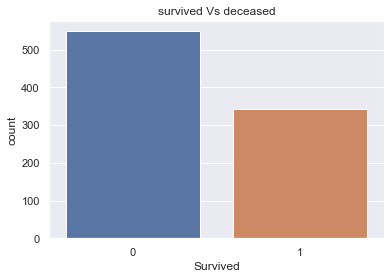

In [21]:
sns.countplot(x = titanic_data['Survived']).set_title('survived Vs deceased');


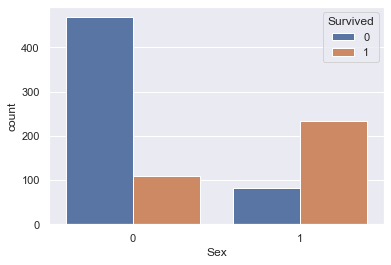

In [22]:
sns.countplot('Sex', hue='Survived', data = titanic_data);


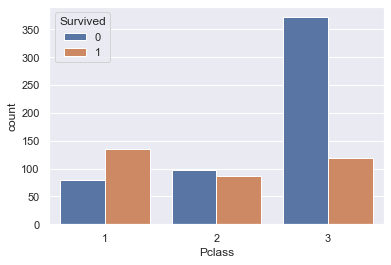

In [23]:
sns.countplot('Pclass', hue='Survived', data = titanic_data);


In [24]:
X = titanic_data.drop(columns= ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.25,random_state=2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(668, 7) (223, 7) (668,) (223,)


In [33]:
logreg = LogisticRegression()


In [34]:
logreg.fit(X_train,Y_train)


LogisticRegression()

In [35]:
X_train_pred = logreg.predict(X_train)
X_train_pred.shape

(668,)

In [36]:
ac_training = accuracy_score(Y_train,X_train_pred)
print('Training Accuracy= ', round(ac_training * 100),'%')

Training Accuracy=  81 %


In [37]:
X_test_pred = logreg.predict(X_test)
X_test_pred.shape

(223,)

In [38]:
ac_testing = accuracy_score(Y_test,X_test_pred)
print('Testing Accuracy= ', round(ac_testing * 100),'%')

Testing Accuracy=  79 %
